In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# reading data
df = pd.read_csv("global_csv.csv")
df

,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
0,1751,3,0,0,3,0,0,NaN
1,1752,3,0,0,3,0,0,NaN
2,1753,3,0,0,3,0,0,NaN
3,1754,3,0,0,3,0,0,NaN
4,1755,3,0,0,3,0,0,NaN
...,...,...,...,...,...,...,...,...
255,2006,8370,1525,3089,3339,356,61,1.27
256,2007,8566,1572,3081,3464,382,68,1.28
257,2008,8783,1631,3122,3571,388,71,1.30
258,2009,8740,1585,3056,3620,413,66,1.28


In [4]:
# dropping all rows with null values
df = df.dropna()
df

,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
199,1950,1630,97,423,1070,18,23,0.64
200,1951,1767,115,479,1129,20,24,0.69
201,1952,1795,124,504,1119,22,26,0.68
202,1953,1841,131,533,1125,24,27,0.69
203,1954,1865,138,557,1116,27,27,0.69
...,...,...,...,...,...,...,...,...
255,2006,8370,1525,3089,3339,356,61,1.27
256,2007,8566,1572,3081,3464,382,68,1.28
257,2008,8783,1631,3122,3571,388,71,1.30
258,2009,8740,1585,3056,3620,413,66,1.28


In [5]:
df = df.drop(['Year', 'Cement', 'Gas Flaring', 'Per Capita'], axis = 1)
df

,Total,Gas Fuel,Liquid Fuel,Solid Fuel
199,1630,97,423,1070
200,1767,115,479,1129
201,1795,124,504,1119
202,1841,131,533,1125
203,1865,138,557,1116
...,...,...,...,...
255,8370,1525,3089,3339
256,8566,1572,3081,3464
257,8783,1631,3122,3571
258,8740,1585,3056,3620


In [6]:
total = df['Total']
gas = df['Gas Fuel']
liquid = df['Liquid Fuel']
solid = df['Solid Fuel']

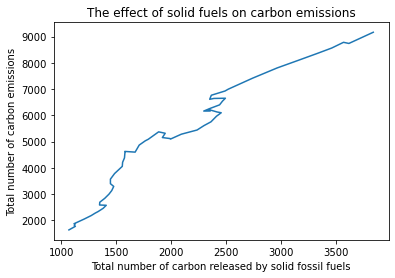

In [7]:
plt.plot(solid,total)
plt.title('The effect of solid fuels on carbon emissions')
plt.xlabel('Total number of carbon released by solid fossil fuels')
plt.ylabel('Total number of carbon emissions')
plt.show()

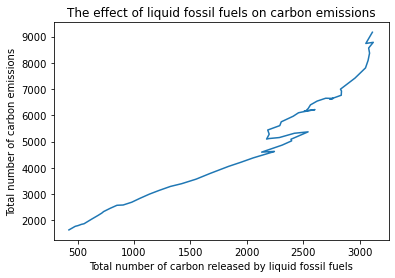

In [8]:
plt.plot(liquid,total)
plt.title('The effect of liquid fossil fuels on carbon emissions')
plt.xlabel('Total number of carbon released by liquid fossil fuels')
plt.ylabel('Total number of carbon emissions')
plt.show()

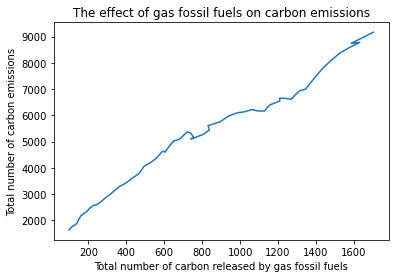

In [9]:
plt.plot(gas,total)
plt.title('The effect of gas fossil fuels on carbon emissions')
plt.xlabel('Total number of carbon released by gas fossil fuels')
plt.ylabel('Total number of carbon emissions')
plt.show()

In [10]:
def getEquation(minXValue, maxXValue, minYValue, maxYValue):
    from numpy import ones,vstack
    from numpy.linalg import lstsq
    points = [(minXValue, minYValue),(maxXValue,maxYValue)]
    x_coords, y_coords = zip(*points)
    A = vstack([x_coords,ones(len(x_coords))]).T
    m, c = lstsq(A, y_coords)[0]
    print("Line Solution is y = {m}x + {c}".format(m=m,c=c))


In [11]:
# method 1 (comparing min x,y point to max x,y point):
# gas equation

minXValue = gas.min()
maxXValue = gas.max()
minYValue = total.min()
maxYValue = total.max()

print("min x value: ", minXValue)
print("max x value: ", maxXValue)
print("min y value: ", minYValue)
print("max y value: ", maxYValue)

getEquation(minXValue, maxXValue, minYValue, maxYValue)

min x value:  97
max x value:  1702
min y value:  1630
max y value:  9167
Line Solution is y = 4.695950155763241x + 1174.492834890965


/var/folders/wn/d97ph6614qd0qb779wxzcsjr0000gn/T/ipykernel_24344/910143262.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, c = lstsq(A, y_coords)[0]


Gas equation: 
y = 4.7x + 1174

In [12]:
# liquid equation
minXValue = liquid.min()
maxXValue = liquid.max()
minYValue = total.min()
maxYValue = total.max()

print("min x value: ", minXValue)
print("max x value: ", maxXValue)
print("min y value: ", minYValue)
print("max y value: ", maxYValue)

getEquation(minXValue, maxXValue, minYValue, maxYValue)

min x value:  423
max x value:  3122
min y value:  1630
max y value:  9167
Line Solution is y = 2.7925157465728048x + 448.76583919969966


/var/folders/wn/d97ph6614qd0qb779wxzcsjr0000gn/T/ipykernel_24344/910143262.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, c = lstsq(A, y_coords)[0]


y = 2.8x + 449

In [13]:
# solid equation
minXValue = solid.min()
maxXValue = solid.max()
minYValue = total.min()
maxYValue = total.max()

print("min x value: ", minXValue)
print("max x value: ", maxXValue)
print("min y value: ", minYValue)
print("max y value: ", maxYValue)

getEquation(minXValue, maxXValue, minYValue, maxYValue)

min x value:  1070
max x value:  3842
min y value:  1630
max y value:  9167
Line Solution is y = 2.7189754689754695x + -1279.3037518037506


/var/folders/wn/d97ph6614qd0qb779wxzcsjr0000gn/T/ipykernel_24344/910143262.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, c = lstsq(A, y_coords)[0]


y = 2.7x + 1279

In [14]:
# method 2 (linear regression)
outer = []
for i in range(len(total)):
    for x, y in zip(gas, total):
        outer.append([x, y])
        


In [15]:
dt = np.array(outer)
X = dt[:, 0]
y = dt[:, 1]

The parameters of the line: [   4.32070767 1660.07392999]


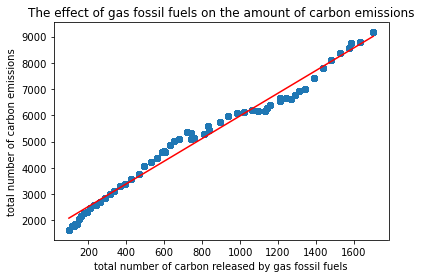

In [16]:
theta = np.polyfit(X, y, 1)

print(f'The parameters of the line: {theta}')

# Now, calculating the y-axis values against x-values according to
# the parameters theta0, theta1 and theta2
y_line = theta[1] + theta[0] * X

# Plotting the data points and the best fit line
plt.scatter(X, y)
plt.plot(X, y_line, 'r')
plt.title('The effect of gas fossil fuels on the amount of carbon emissions')
plt.xlabel('total number of carbon released by gas fossil fuels')
plt.ylabel('total number of carbon emissions')

plt.show()

gas: y = 4.32x + 1660

In [17]:
outer = []
for i in range(len(total)):
    for x, y in zip(liquid, total):
        outer.append([x, y])

In [18]:
dt = np.array(outer)
X = dt[:, 0]
y = dt[:, 1]

The parameters of the line: [  2.35363736 264.53167711]


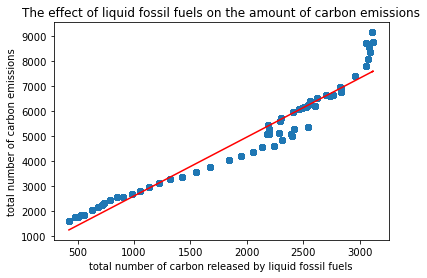

In [19]:
theta = np.polyfit(X, y, 1)

print(f'The parameters of the line: {theta}')

# Now, calculating the y-axis values against x-values according to
# the parameters theta0, theta1 and theta2
y_line = theta[1] + theta[0] * X

# Plotting the data points and the best fit line
plt.scatter(X, y)
plt.plot(X, y_line, 'r')
plt.title('The effect of liquid fossil fuels on the amount of carbon emissions')
plt.xlabel('total number of carbon released by liquid fossil fuels')
plt.ylabel('total number of carbon emissions')

plt.show()

y = 2.35x + 264

In [22]:
outer = []
for i in range(len(total)):
    for x, y in zip(solid, total):
        outer.append([x, y])

In [23]:
dt = np.array(outer)
X = dt[:, 0]
y = dt[:, 1]

The parameters of the line: [   2.87576936 -802.16892052]


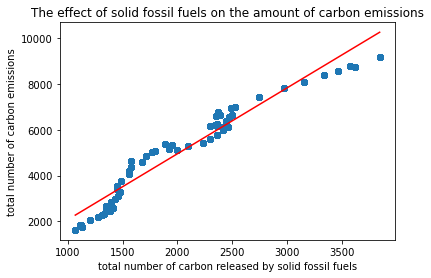

In [25]:
theta = np.polyfit(X, y, 1)

print(f'The parameters of the line: {theta}')

# Now, calculating the y-axis values against x-values according to
# the parameters theta0, theta1 and theta2
y_line = theta[1] + theta[0] * X

# Plotting the data points and the best fit line
plt.scatter(X, y)
plt.plot(X, y_line, 'r')
plt.title('The effect of solid fossil fuels on the amount of carbon emissions')
plt.xlabel('total number of carbon released by solid fossil fuels')
plt.ylabel('total number of carbon emissions')

plt.show()

y = 2.88x - 802